# **Local Minima 문제에도 불구하고 딥러닝이 잘 되는 이유**

- local minima 문제가 사실은 고차원(High Dimensional)의 공간에서는 발생하기 힘든, 매우 희귀한 경우이기 때문.
- 실제 딥러닝 모델에서는 weight가 수도없이 많으며, 그 수많은 weight가 모두 local minima에 빠져야 weight update가 정지되기 때문에 local minima는 큰 문제가 되지 않음

**Local Minima 문제에도 불구하고 딥러닝이 잘 되는, 더 구체적인 이유**

- 고차원의 공간에서 모든 축의 방향으로 오목한 형태가 형성될 확률은 거의 0에 가깝다.
- 고차원의 공간에서 대부분의 critical point는 local minima가 아니라 saddle point다.
- 고차원의 공간에서 설령 local minima가 발생한다 하더라도 이는 global minimum이거나 또는 global minimum과 거의 유사한 수준의 에러 값을 갖는다.
- critical point에 포함된 위로 볼록인 방향 축의 비율이 크면 클수록 높은 에러를 가지기 때문.
- (실험적 결과) local minima는 위로 볼록인 경우가 하나도 없는 경우이기 때문에 결과적으로 매우 낮은 에러를 갖게 될 것이다.

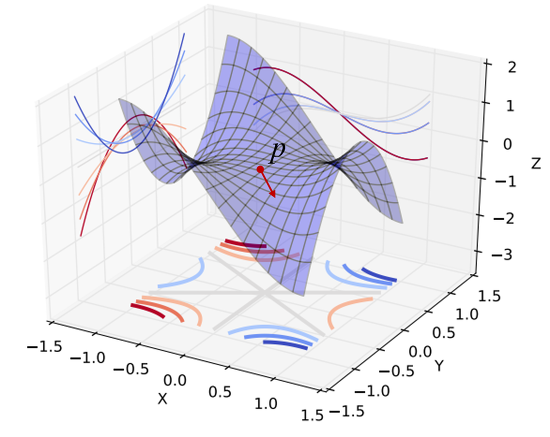

**Critical point, Saddle point, Local minimum**

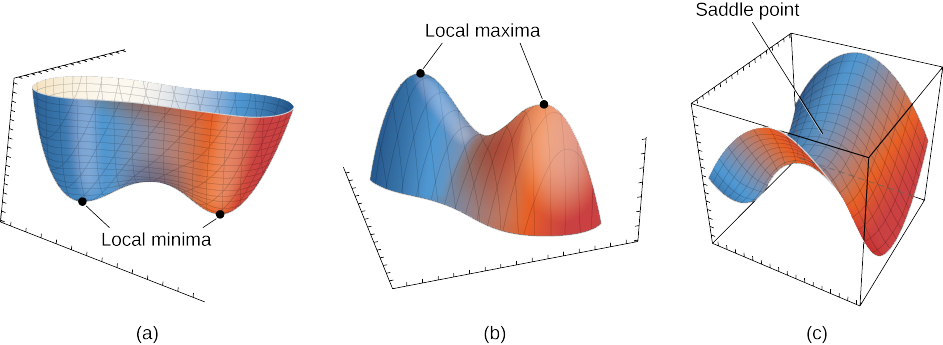

- critical point: 일차 미분이 0인 지점. (local/global)minima, (local/global)maxima, saddle point를 가리킴
- local minimum: 모든 방향에서 극소값을 만족하는 점
- global minimum: 모든 방향에서 극소값을 만족하는 점 중에 가장 값이 작은 점(정답)
- saddle point: 어느 방향에서 보면 극대값이지만 다른 방향에서 보면 극소값이 되는 점

# **찾은 해가 Global Minimum인지 아닌지 알 수 있는 방법**

- Gradient Descent 방식에서 local minima에 도달함은 증명되어있으나, global minima에 도달하는 것은 보장되지 않음.
 - 현재 지점이 global minima인지도 알 수 없다.
 - 딥러닝에서 다루는 문제가 convexity를 만족하지 않기 때문.
- local minima를 찾는다면, 그 지점이 곧 global minima일 가능성이 큼.
 - saddle point가 아닌 완전한 local minimum이 발생하는 경우는 희귀.
 - 따라서 모든 방향에서 아래로 볼록인 local minima를 발견한다면, 그 지점이 바로 global minima일 가능성이 높다

# **GD(Gradient Descent)가 Local Minima 문제를 피하는 방법**

Local minima 문제를 피하는 방법으로는 Momentum, Nesterov Accelerated Gradient(NAG), Adagrad, Adadelta, RMSprop, Adam 등이 있다.

**SGD는 Stochastic Gradient Descent**으로, 하나 혹은 여러개의 데이터를 확인한 후에 어느 방향으로 갈 지 정하는 가장 기초적인 방식

**Momentum이란 관성을 의미**하며, 이전 gradient의 방향성을 담고있는 momentum 인자를 통해 흐르던 방향을 어느 정도 유지시켜 local minima에 빠지지 않게 만든다.관성을 이용하여, 학습 속도를 더 빠르게 하고, 변곡점을 잘 넘어갈 수 있도록 해주는 역할을 수행한다.

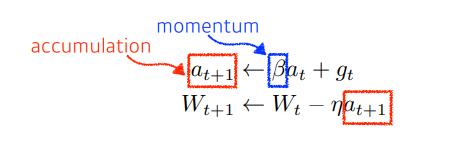

**Nesterov Accelerated Gradient(NAG)** 는 모멘텀과 비슷한 역할을 수행하는 Look-ahead gradient 인자를 포함하여, $a$ 라는 accumulate gradient가 gradient를 감소시키는 역할을 한다. 모멘텀과 다른 점은, 미리 한 스텝을 옮겨가본 후에 어느 방향으로 갈지 정한다는 것.

Adagrad란 뉴럴넷의 파라미터가 많이 바뀌었는지 적게 바뀌었는지 확인하고, 적게 변한건 더 크게 변하게 하고, 크게 변한건 더 작게 변화시키는 방법이다.
-  Adagrad는 sum of gradient squares($G_t$)를 사용하는데, 이는 그래디언트가 얼만큼 변했는지를 제곱해서 더하는 것이므로 계속 커진다는 문제가 발생.
- $G_t$가 계속 커지면 분모가 점점 무한대에 가까워지게 되어, $W$ 업데이트가 되지 않게 되어, 뒤로 갈수록 학습이 점점 안되는 문제점이 발생.

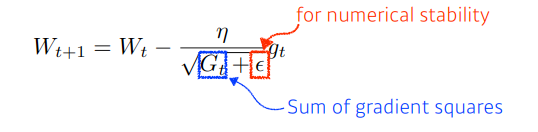

Adadelta는 Exponential Moving Average(EMA)를 사용하여, Adagrad의 $G_t$가 계속 커지는 현상을 막을 수 있다.
-  EMA는 현재 타임스텝으로부터 윈도우 사이즈만큼의 파라미터 변화(그래디언트 제곱의 변화)를 반영하는 역할을 하는데, 이전의 값을 모두 저장하는 것이 아닌, 이전 변화량에 특정 비율을 곱해 더한 인자를 따로 두는 방식.
- Adadelta는 learning rate가 없다.

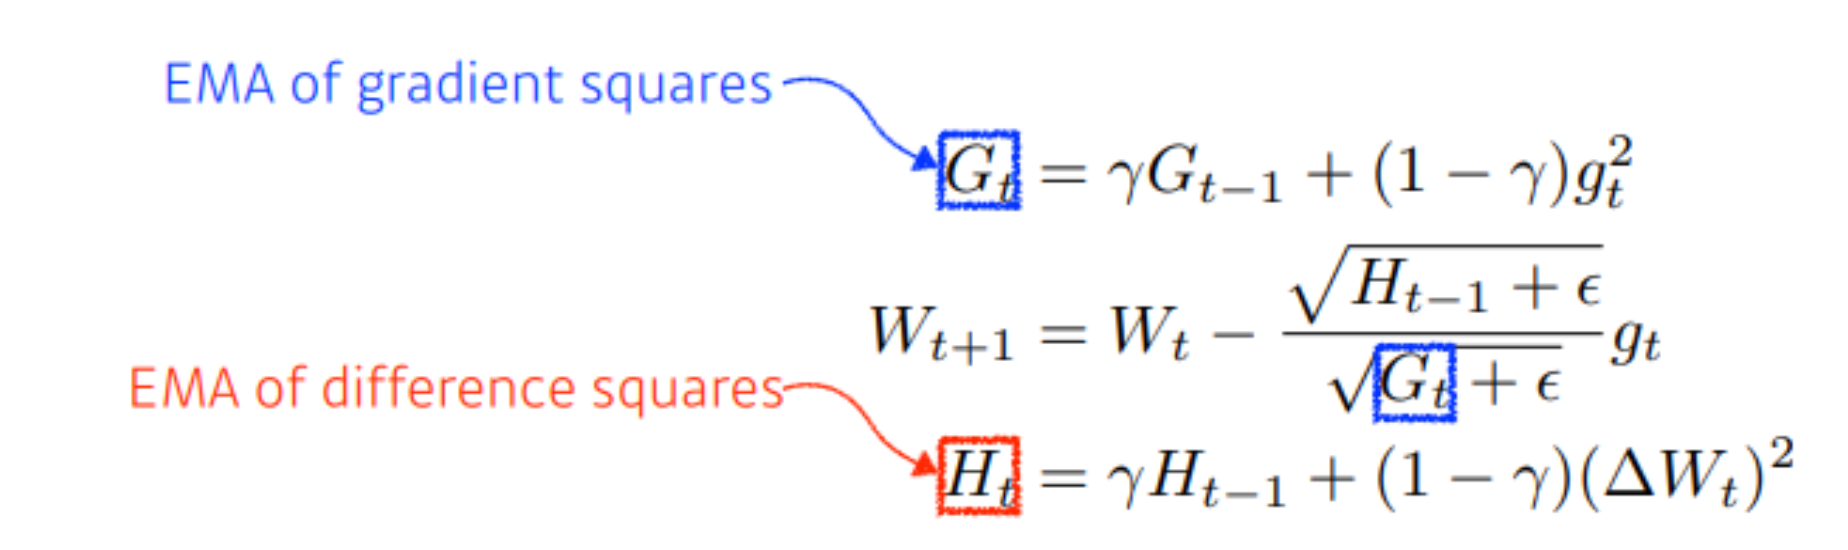